In [3]:
import  pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\heart_disease_data_updated.csv")
df

,Age,Gender,Cholesterol,RestingBP,Smoking,HeartDisease
0,68,Male,258.9,140.3,0,Unhealthy
1,58,Male,281.8,139.5,0,Unhealthy
2,44,Male,233.8,118.5,0,Healthy
3,72,Male,257.0,116.4,0,Unhealthy
4,37,Male,244.3,144.8,1,Unhealthy
...,...,...,...,...,...,...
295,62,Male,170.3,140.2,0,Healthy
296,53,Male,227.3,105.0,0,Healthy
297,40,Female,234.1,141.4,0,Healthy
298,78,Male,241.3,180.0,1,Unhealthy


In [6]:
df.isnull().sum()

Age             0
Gender          0
Cholesterol     0
RestingBP       0
Smoking         0
HeartDisease    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           300 non-null    int64  
 1   Gender        300 non-null    object 
 2   Cholesterol   300 non-null    float64
 3   RestingBP     300 non-null    float64
 4   Smoking       300 non-null    int64  
 5   HeartDisease  300 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 14.2+ KB


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['Gender']=df['Gender'].map({'Male':1,'Female':2})

In [11]:
df

,Age,Gender,Cholesterol,RestingBP,Smoking,HeartDisease
0,68,1,258.9,140.3,0,Unhealthy
1,58,1,281.8,139.5,0,Unhealthy
2,44,1,233.8,118.5,0,Healthy
3,72,1,257.0,116.4,0,Unhealthy
4,37,1,244.3,144.8,1,Unhealthy
...,...,...,...,...,...,...
295,62,1,170.3,140.2,0,Healthy
296,53,1,227.3,105.0,0,Healthy
297,40,2,234.1,141.4,0,Healthy
298,78,1,241.3,180.0,1,Unhealthy


In [12]:
df['HeartDisease'].unique()

array(['Unhealthy', 'Healthy'], dtype=object)

In [13]:
df['HeartDisease']=df['HeartDisease'].map({'Unhealthy':1,'Healthy':2})

In [14]:
df

,Age,Gender,Cholesterol,RestingBP,Smoking,HeartDisease
0,68,1,258.9,140.3,0,1
1,58,1,281.8,139.5,0,1
2,44,1,233.8,118.5,0,2
3,72,1,257.0,116.4,0,1
4,37,1,244.3,144.8,1,1
...,...,...,...,...,...,...
295,62,1,170.3,140.2,0,2
296,53,1,227.3,105.0,0,2
297,40,2,234.1,141.4,0,2
298,78,1,241.3,180.0,1,1


In [15]:
df.isnull().sum()

Age             0
Gender          0
Cholesterol     0
RestingBP       0
Smoking         0
HeartDisease    0
dtype: int64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df.corr()

,Age,Gender,Cholesterol,RestingBP,Smoking,HeartDisease
Age,1.000000,-0.140139,0.037343,0.050159,-0.011595,-0.444281
Gender,-0.140139,1.000000,-0.006445,0.037548,0.094642,0.047987
Cholesterol,0.037343,-0.006445,1.000000,0.021727,0.019225,-0.227699
RestingBP,0.050159,0.037548,0.021727,1.000000,-0.079892,-0.210548
Smoking,-0.011595,0.094642,0.019225,-0.079892,1.000000,-0.556600
HeartDisease,-0.444281,0.047987,-0.227699,-0.210548,-0.556600,1.000000


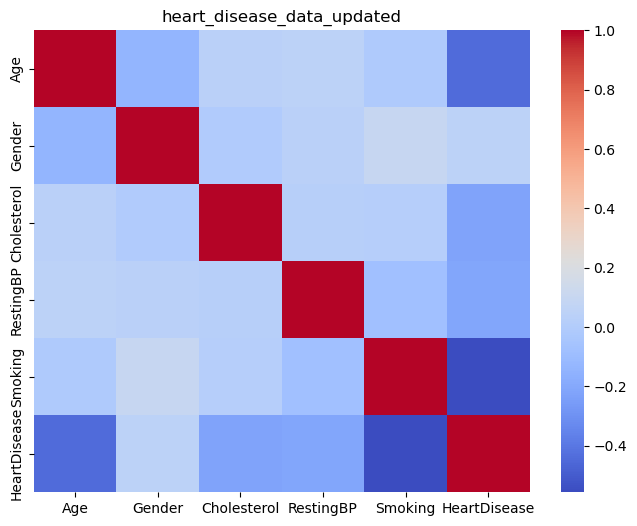

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title("heart_disease_data_updated")
plt.show()          

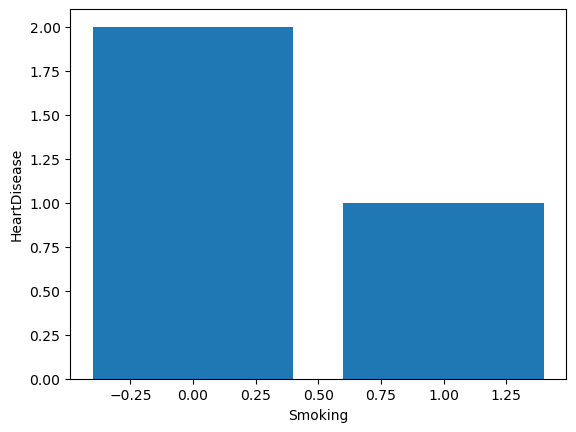

In [23]:
import seaborn as sns
x=df['Smoking']
y=df['HeartDisease']
plt.xlabel("Smoking")
plt.ylabel("HeartDisease")
plt.bar(x,y)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X=df.drop('HeartDisease',axis=1)

In [26]:
x

0      0
1      0
2      0
3      0
4      1
      ..
295    0
296    0
297    0
298    1
299    0
Name: Smoking, Length: 300, dtype: int64

In [27]:
y=df['HeartDisease']
y

0      1
1      1
2      2
3      1
4      1
      ..
295    2
296    2
297    2
298    1
299    2
Name: HeartDisease, Length: 300, dtype: int64

In [28]:
X_train,X_test,y_train,_y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
model=RandomForestRegressor(n_estimators=100,random_state=42)


In [33]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_pred=model.predict(X_test)

In [35]:
y_pred

array([1.  , 1.12, 1.05, 1.35, 1.38, 1.  , 1.23, 1.  , 1.  , 1.35, 1.29,
       1.  , 1.  , 2.  , 1.  , 1.  , 2.  , 1.61, 1.89, 1.  , 1.06, 1.01,
       1.09, 1.  , 1.88, 1.01, 1.  , 1.6 , 1.23, 1.  , 1.  , 1.  , 1.  ,
       1.23, 1.02, 1.  , 1.  , 1.  , 2.  , 1.75, 1.12, 1.  , 1.  , 1.98,
       1.11, 1.  , 1.03, 1.81, 1.  , 2.  , 1.18, 1.  , 2.  , 1.05, 1.99,
       1.04, 2.  , 1.  , 1.  , 1.  ])

In [37]:
sample=X_test.iloc[2:8]
prediction=model.predict(sample)

In [38]:
sample

,Age,Gender,Cholesterol,RestingBP,Smoking
152,68,1,233.4,120.8,0
9,40,2,238.7,168.1,0
233,46,1,243.0,182.1,0
226,73,1,254.7,135.3,0
196,62,1,221.7,146.5,0
109,64,1,191.9,122.1,1


In [39]:
import matplotlib.pyplot as plt

In [42]:
importance=model.feature_importances_
feature_name=X.columns

In [ ]:
plt.title("HEART DISEASE")
plt.xlabel("impoortance")
plt.barh(